# Keras Syntax Basics

In [1]:
import numpy as np
import pandas as pd

### Loading the data

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


### Exploring the Data

In [6]:
import seaborn as sns

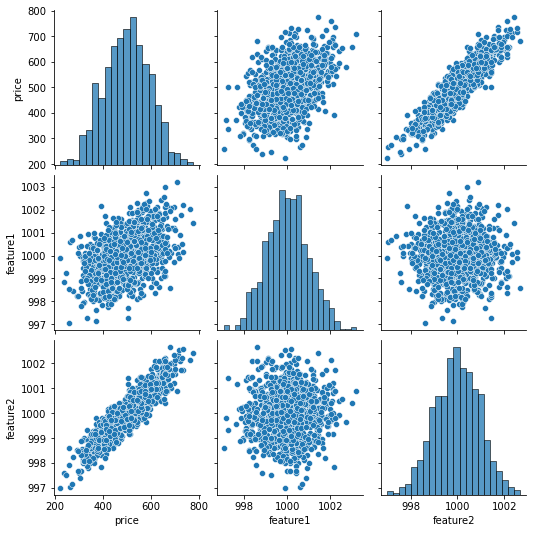

In [7]:
sns.pairplot(df)

### Test Train Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[['feature1', 'feature2']].values

y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
X_train.shape

(700, 2)

In [64]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [11]:
X_test.shape

(300, 2)

In [12]:
y_train.shape

(700,)

In [13]:
y_test.shape

(300,)

In [65]:
y_test

array([402.29631873, 624.15619847, 582.4550663 , 578.58860646,
       371.22410361, 584.38110772, 514.40564086, 464.11587006,
       551.65009963, 451.8041724 , 613.95995262, 547.73198239,
       428.31614877, 413.84178036, 654.83912076, 429.21452014,
       512.04904895, 657.71868008, 674.31102047, 565.19184559,
       338.0902386 , 450.9760715 , 375.13754715, 379.10982057,
       562.05793604, 593.6677957 , 531.27754687, 423.65453319,
       656.65474461, 412.90687671, 439.49653517, 488.78691774,
       448.51914416, 685.21654079, 424.81078609, 418.45717839,
       507.44318662, 550.14246248, 503.21614081, 397.88209319,
       621.11885596, 411.57560703, 609.3840753 , 449.02606966,
       503.51419982, 578.32901814, 664.50877632, 498.6284209 ,
       316.9505926 , 478.35823792, 514.89474416, 374.19760282,
       531.66193891, 405.40016562, 637.30962074, 482.55641188,
       624.99250404, 624.24709206, 455.13953399, 484.46159148,
       492.93591939, 477.73749721, 689.1734889 , 397.62

### Scaling the Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
len(X_train)

700

In [19]:
X_test[:5]

array([[0.39533339, 0.38540671],
       [0.57300502, 0.74070924],
       [0.61294076, 0.65734264],
       [0.38169528, 0.73076311],
       [0.07776591, 0.46323644]])

# Tensorflow 2.0 Syntax

### Import options

There are many ways to import tensorflow based on preference, but we will follow the official documentation.

In [25]:
import tensorflow as tf

In [26]:
from tensorflow.keras.models import Sequential

### Creating a Model

In [27]:
from tensorflow.keras.layers import Dense, Activation

Creating layers as a list

In [29]:
model = Sequential([
    Dense(units=4),
    Dense(units=4),
    Dense(units=4)
])

Adding layers one by one

In [30]:
model = Sequential()

model.add(Dense(units=4))
model.add(Dense(units=4))
model.add(Dense(units=4))

Creating a model and compiling

In [67]:
model = Sequential()

model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))

# Final output node
model.add(Dense(units=1))

model.compile(optimizer='rmsprop',loss='mse')

## Training

In [68]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 257123.8906
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256547.9844
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 255994.8125
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 255411.0156
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 254818.5625
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 254204.0938
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 253543.2031
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 252820.2344
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 252031.2656
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 251179.8125
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 250263.3125
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 1ms/step - loss: 1236.8696
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 1210.1068
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 1184.3379
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 1164.2667
Epoch 101/250
22/22 [==============================] - 0s 1ms/step - loss: 1135.5933
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 1107.6807
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 1084.3519
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 1058.0182
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 1033.6063
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 1010.1016
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 984.8152
Epoch 108/250
22/22 [==============================] - 0s 1ms/step - loss: 961.880

Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2767
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 24.0139
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2682
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 24.2170
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 24.2734
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 24.1726
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 24.1476
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 24.2605
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 24.0765
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 24.6192
Epoch 205/250
22/22 [==============================] - 0s 1ms/step - loss: 24.2845
Epoch 206/250
22/22 [==============================] - 0s 1ms/step - loss: 24.2982
Epoc

## Evaluation

In [69]:
model.history.history

{'loss': [257123.890625,
  256547.984375,
  255994.8125,
  255411.015625,
  254818.5625,
  254204.09375,
  253543.203125,
  252820.234375,
  252031.265625,
  251179.8125,
  250263.3125,
  249314.1875,
  248329.21875,
  247287.34375,
  246171.015625,
  244966.578125,
  243665.0,
  242269.28125,
  240770.625,
  239178.0625,
  237486.859375,
  235672.4375,
  233754.0625,
  231708.1875,
  229544.484375,
  227262.484375,
  224853.78125,
  222305.765625,
  219634.671875,
  216821.328125,
  213881.890625,
  210801.921875,
  207580.3125,
  204201.328125,
  200664.734375,
  197002.171875,
  193196.75,
  189231.765625,
  185121.703125,
  180879.078125,
  176479.578125,
  171954.09375,
  167274.40625,
  162455.75,
  157475.296875,
  152397.53125,
  147180.265625,
  141864.03125,
  136413.25,
  130867.96875,
  125241.203125,
  119507.6328125,
  113712.421875,
  107863.5546875,
  101946.765625,
  96013.1328125,
  90003.2734375,
  84017.09375,
  78035.09375,
  72107.53125,
  66242.5859375,
  60426.2

In [70]:
loss = model.history.history['loss']

In [71]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training loss per epoch')

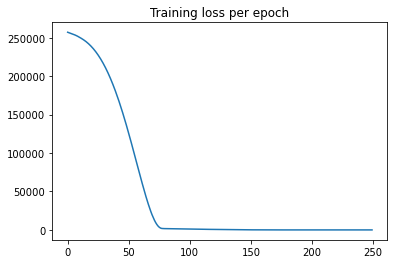

In [72]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title('Training loss per epoch')

## Compare final evaluation on training set and test set

In [73]:
model.metrics_names

['loss']

In [74]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

In [75]:
train_score

24.59168815612793

In [76]:
test_score

25.2056941986084

## Further Evaluations

In [77]:
test_pred = model.predict(X_test)

In [78]:
test_pred

array([[404.73892],
       [622.8666 ],
       [591.47253],
       [571.59076],
       [366.10434],
       [578.5337 ],
       [514.45685],
       [458.52017],
       [548.6224 ],
       [446.93747],
       [611.11896],
       [548.29785],
       [418.54272],
       [408.32095],
       [650.5359 ],
       [436.72592],
       [507.82986],
       [659.2529 ],
       [661.8951 ],
       [564.89044],
       [333.72537],
       [444.26212],
       [381.99487],
       [378.21838],
       [565.9555 ],
       [609.9356 ],
       [531.7716 ],
       [427.29544],
       [654.76373],
       [413.51932],
       [442.0582 ],
       [484.53268],
       [437.84402],
       [681.1507 ],
       [424.18533],
       [417.13583],
       [501.30472],
       [549.8423 ],
       [509.13754],
       [394.82822],
       [617.91766],
       [416.06656],
       [603.78436],
       [445.37473],
       [501.38483],
       [581.0483 ],
       [668.28955],
       [489.7982 ],
       [318.0693 ],
       [484.8336 ],


In [79]:
pred_df = pd.DataFrame(y_test, columns=['Y test'])

In [80]:
pred_df

,Y test
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [81]:
test_pred = pd.Series(test_pred.reshape(300,))

In [83]:
pred_df = pd.concat([pred_df, test_pred], axis=1)

In [84]:
pred_df

,Y test,0
0,402.296319,404.738922
1,624.156198,622.866577
2,582.455066,591.472534
3,578.588606,571.590759
4,371.224104,366.104340
...,...,...
295,525.704657,528.432434
296,502.909473,515.018433
297,612.727910,608.984436
298,417.569725,416.389709


In [85]:
pred_df.columns = ['Y test', 'Prediction']

In [88]:
pred_df.head()

,Y test,Prediction
0,402.296319,404.738922
1,624.156198,622.866577
2,582.455066,591.472534
3,578.588606,571.590759
4,371.224104,366.104340


<AxesSubplot:xlabel='Y test', ylabel='Prediction'>

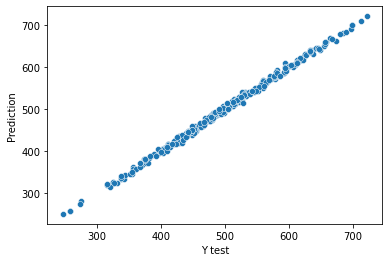

In [89]:
sns.scatterplot(x='Y test', y='Prediction', data=pred_df)

In [90]:
pred_df['Error'] = pred_df['Y test'] - pred_df['Prediction']

In [91]:
pred_df.head()

,Y test,Prediction,Error
0,402.296319,404.738922,-2.442603
1,624.156198,622.866577,1.289621
2,582.455066,591.472534,-9.017468
3,578.588606,571.590759,6.997847
4,371.224104,366.104340,5.119764


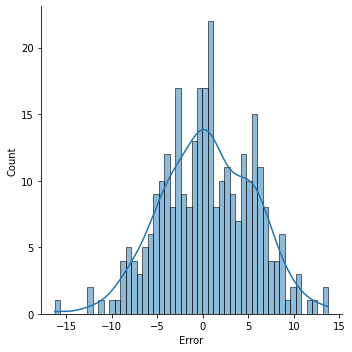

In [94]:
sns.displot(pred_df['Error'], bins=50, kde=True)

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [96]:
mean_absolute_error(pred_df['Y test'], pred_df['Prediction'])

4.017455744173284

In [98]:
mean_squared_error(pred_df['Y test'], pred_df['Prediction'])

25.205678445919798

In [101]:
test_score  # Similar to the loss function stated when creating the model which is MSE

25.2056941986084

In [102]:
mean_squared_error(pred_df['Y test'], pred_df['Prediction']) ** 0.5  # Root mean squared error

5.020525714098056

## Predicting on brand new data

In [110]:
# [[feature1, feature2]]
new_feat = [[997, 1000]]

In [111]:
scaler.transform(new_feat)

array([[-0.02373024,  0.53968792]])

In [112]:
model.predict(scaler.transform(new_feat))

array([[379.1685]], dtype=float32)

## Saving and Loading a Model

In [113]:
from tensorflow.keras.models import load_model

In [114]:
model.save('gem_model.h5')

In [118]:
loaded_model = load_model('gem_model.h5')

In [120]:
loaded_model.predict(scaler.transform(new_feat))

array([[379.1685]], dtype=float32)